### Quadrinôme :
- ABDESSAMED BOULARIACHE
- KEMOUM Meroua
- MAHIDDINE Mohamed Amine
- TAZIR REDA

# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [150]:
# données
#X = np.genfromtxt('X.csv', delimiter=',', dtype=float)
#X.shape

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


In [151]:
X = np.genfromtxt('Xval.csv', delimiter=',', dtype=float)
X.shape

(307, 2)

In [152]:
Y = np.genfromtxt('yval.csv', delimiter=',', dtype=float)[:, np.newaxis]
Y.shape

(307, 1)

# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

In [153]:
def split(arr, cond):
    return [arr[cond], arr[~cond]]

In [154]:
X0, X1 = split(X, Y[:,0] == 0) #Séparer entre les caracteristiques qui donnent 0 comme résultat et les autres qui donnent 1

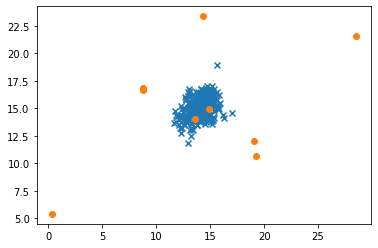

In [155]:
plt.scatter(X0[:,0],X0[:,1], marker ='x')
plt.scatter(X1[:,0],X1[:,1], marker ='o')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [156]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)

In [157]:
def calculProba(X,m,v):
    return (1 / (np.sqrt(2 * v * np.pi))) * np.exp(- np.power(X - m, 2) / (2 * v))

In [158]:
prob = calculProba(X, m, v)

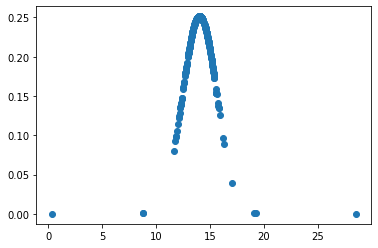

In [159]:
plt.scatter(X[:,0],prob[:,0])

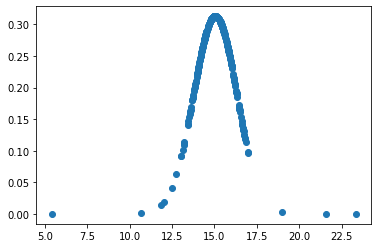

In [160]:
plt.scatter(X[:,1],prob[:,1])

## Choisir le epsilon

In [161]:
f1_scores = []
proba = calculProba(X, m, v)
yproba = proba[:,0]*proba[:,1]
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(Y, y_pred)))

proba_univariee = yproba

In [162]:
f1_scores.sort(key=lambda x: x[1])
meilleur_epsilon = f1_scores[-1]

In [163]:
print(meilleur_epsilon)

(0.0004, 0.8750000000000001)


##  Gaussienne multivariée

In [164]:
def calculProbaMultivariate(X):
    cov = np.cov(X.T)
    det_cov = np.linalg.det(cov) #determinant of the covariance matrix
    inv_cov = np.linalg.inv(cov) #inverse of the covariance matrix
    m = np.mean(X, axis=0) #mean matrix
    return (1 / np.sqrt(2 * np.pi * det_cov)) * np.exp((- 1/2) * (((X - m) @ inv_cov) * (X - m)).sum(axis=1))[:, np.newaxis]

In [165]:
f1_scores = []
prob_multivariate = calculProbaMultivariate(X)
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(prob_multivariate.shape)
    y_pred[prob_multivariate >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(Y, y_pred)))

In [166]:
f1_scores.sort(key=lambda x: x[1])
meilleur_epsilon = f1_scores[-1]

In [167]:
print(meilleur_epsilon)

(0.0018000000000000002, 0.8750000000000001)


### resultat
on a obtenu différent thresholds en testant les deux gaussiennes

In [169]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

##  Visualiser en 3D des gaussiennes univariées et la gaussienne multivariée

In [170]:
proba_univariee = np.reshape(proba_univariee,Y.shape)

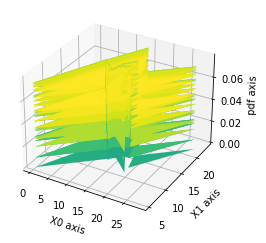

In [171]:
#Make a 3D plot
fig = plt.figure()

ax1 = plt.subplot(projection='3d')
ax1.plot_surface(X[:, 0], X[:, 1], proba_univariee ,cmap='viridis',linewidth=0)
ax1.set_xlabel('X0 axis')
ax1.set_ylabel('X1 axis')
ax1.set_zlabel('pdf axis')
plt.show()

In [172]:
prob_multivariate.shape


(307, 1)

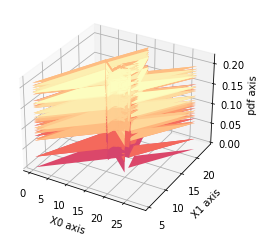

In [173]:
ax2 = plt.subplot(projection='3d')
ax2.plot_surface(X[:, 0], X[:, 1], prob_multivariate ,cmap='magma',linewidth=0)
ax2.set_xlabel('X0 axis')
ax2.set_ylabel('X1 axis')
ax2.set_zlabel('pdf axis')
plt.show()

# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison. 
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.
